# Setup

In [2]:
#  %run 'Setup.py'

8 different classes: Electronic, Experimental, Folk, Hip-Hop, Instrumental, International, Pop or Rock.
objective 1: construct a classifier which, based on the features of a song, predicts its genre
objective 2: estimate its generalisation error under the 0–1 loss.
Features are real-valued, correspond to summary statistics (mean, sd, skewness, kurtosis, median, min, max) of 
time series of various music features, such as the chromagram or the Mel-frequency cepstrum.
Feature description: 

Feature description: 
chroma_cens: Chroma Energy Normalized (CENS, 12 chroma) - 84 features
chroma_cqt: Constant-Q chromagram (12 chroma) - 84 features
chroma_stft: Chromagram (12 chroma) - 84 features
mfcc: Mel-frequency cepstrum (20 coefficients) - 140 features
rmse: Root-mean-square - 7 features
spectral_bandwidth: Spectral bandwidth - 7 features
spectral_centroid: Spectral centroid - 7 features
spectral_contrast: Spectral contrast (7 frequency bands) - 49 features
spectral_rolloff: Roll-off freque

## Import packages

## Get Data

In [3]:
# Load the training data and the test inputs
x_train = pd.read_csv('X_train.csv', index_col=0, header=[0, 1, 2])
x_train_np = np.array(x_train)
y_train = pd.read_csv('y_train.csv', index_col=0)
y_train_np = y_train.squeeze().to_numpy()  # Make y_train a NumPy array
x_test = pd.read_csv('X_test.csv', index_col=0, header=[0, 1, 2])
x_test_np = np.array(x_test)

x_train_flat_columns = ['_'.join(col).strip() for col in x_train.columns.values]
x_train.columns = x_train_flat_columns

x_test_flat_columns = ['_'.join(col).strip() for col in x_test.columns.values]
x_test.columns = x_train_flat_columns
# Prepare data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_np.ravel())

# Split training data into training and temporary validation sets
X_train, X_temp, Y_train, Y_temp = train_test_split(x_train, y_train_encoded, test_size=0.4, random_state=42)

# Split the temporary validation set into validation and fake test set
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_real_test_scaled = scaler.transform(x_test)  # real test set we don't have labels for

In [7]:
X_test_scaled.shape

(1200, 518)

### Function to save EPS Plots directly to Overleaf

In [2]:
import getpass
import os
export_username = "ts" # Only save plots to dropbox on Tobias's code
def save_plot(plot, filename):
    username = getpass.getuser()
    filepath = "/Users/ts/Library/CloudStorage/Dropbox/Apps/Overleaf/SML Practical/Figures"
    filename += ".eps"
    if username == export_username:
        plot.savefig(os.path.join(filepath, filename), format='eps') # Save as EPS

# EDA

## Check Balance of Classes

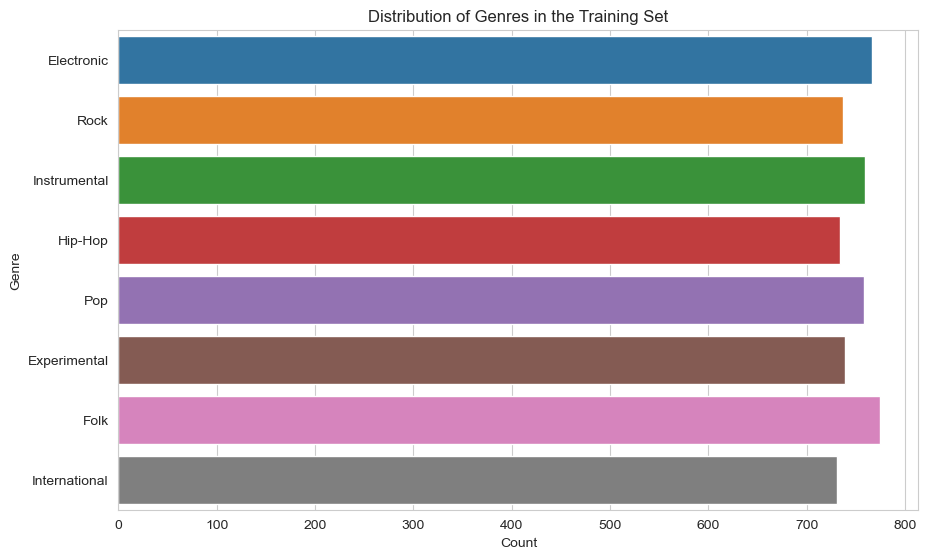

In [3]:
class_bal = plt.figure(figsize=(10, 6))
sns.countplot(data=y_train, y='Genre')
plt.title('Distribution of Genres in the Training Set')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()
save_plot(class_bal, "Class-Balance")

## Plot Distribution of Medians across feature subset

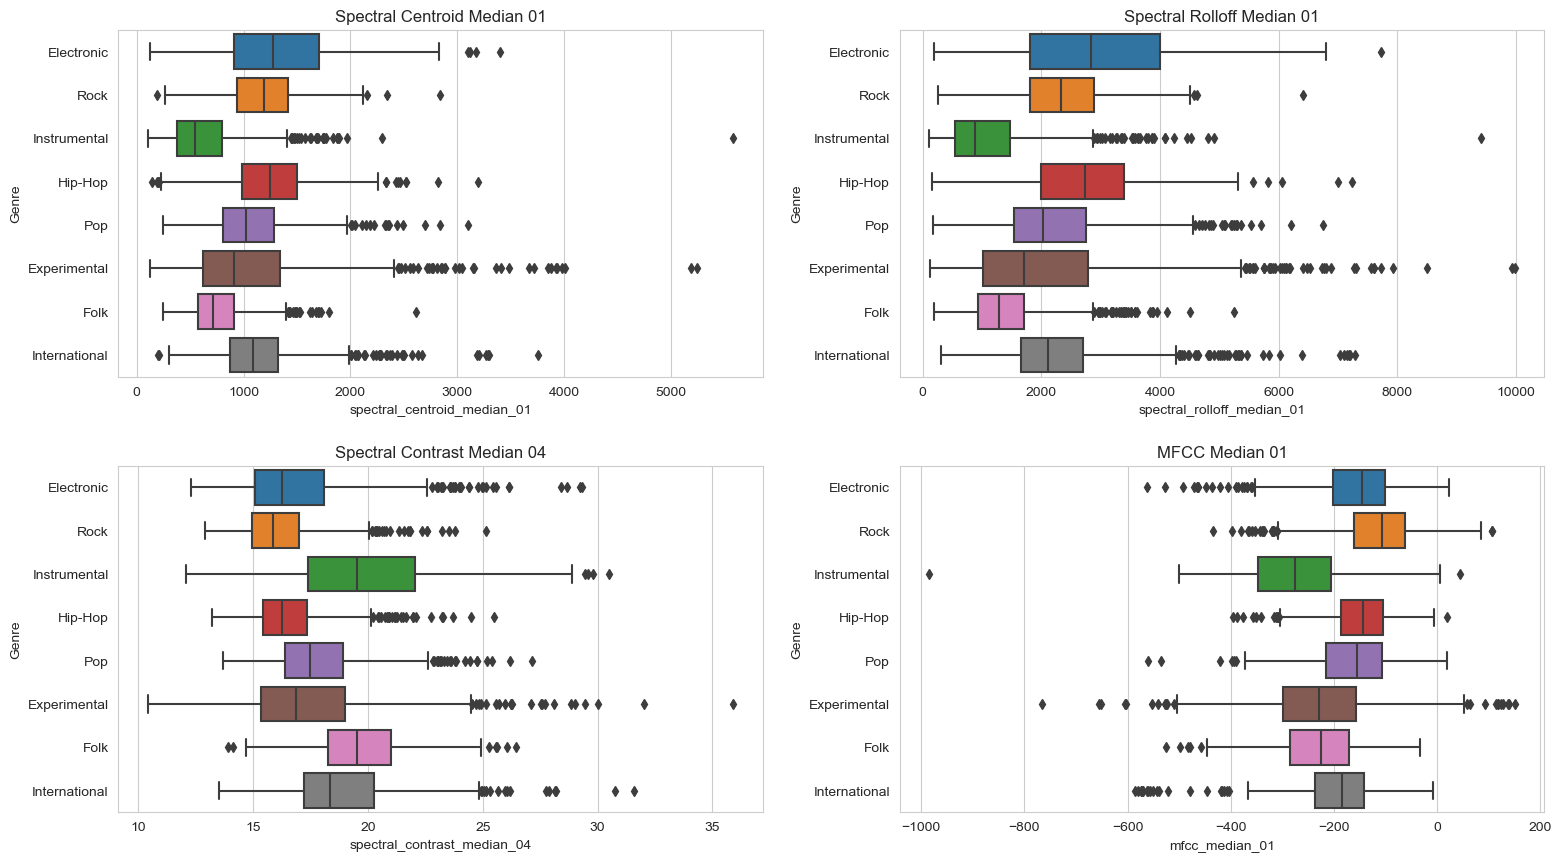

In [5]:
x_train_with_genre = x_train.merge(y_train, left_index=True, right_on='Id') # Merge Genre labels on to training data
# Create the subplots
box1, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

# Top-left subplot for spectral_centroid_median_01
sns.boxplot(x='spectral_centroid_median_01', y='Genre', data=x_train_with_genre, ax=axs[0, 0])
axs[0, 0].set_title('Spectral Centroid Median 01')

# Top-right subplot for spectral_rolloff_median_01
sns.boxplot(x='spectral_rolloff_median_01', y='Genre', data=x_train_with_genre, ax=axs[0, 1])
axs[0, 1].set_title('Spectral Rolloff Median 01')

# Bottom-left subplot for spectral_contrast_median_04
sns.boxplot(x='spectral_contrast_median_04', y='Genre', data=x_train_with_genre, ax=axs[1, 0])
axs[1, 0].set_title('Spectral Contrast Median 04')

# Bottom-right subplot for mfcc_median_01
sns.boxplot(x='mfcc_median_01', y='Genre', data=x_train_with_genre, ax=axs[1, 1])
axs[1, 1].set_title('MFCC Median 01')

# Adjust the font scale for better readability
sns.set(font_scale=1.6)

# Tight layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
save_plot(box1, "boxplot-1")

# Julia

In [1]:
# hello let's try this code
print("julia is the best")

julia is the best


# Max

# Tobias